In [51]:
import requests 
import pandas as pd
import json
#import MySQLdb
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

def dataQuery():
    baseUrl = "https://opendata.lillemetropole.fr/api/records/1.0/search/?dataset="
    paramUrl = "&rows=120"
    # on définit une liste vide qui sera incrémentée à chaque nouvelle dataframe
    dataFrames = []
    # dictionnaire numéroté pour concaténer l'url avec les nom de services à analyser
    services = { 0: "bureaux-de-poste",
                 1: "localisation-hopitaux",
                 2: "postes-securite",
                 3: "cinemas-theatres-mel",
                 4: "adresse-et-geolocalisation-des-etablissements-denseignement-du-premier-et-second",
    }
    # pour chaque service, la boucle créé l'url d'appel correspondant puis normalise le résultat du json et le classe dans une dataframe
    for i in range(5):
     urlApi = baseUrl + services[i] + paramUrl
     dataFrames.append(pd.DataFrame.from_dict(pd.io.json.json_normalize(json.loads(requests.get(urlApi).text)['records']), orient='columns'))
    
    return dataFrames

In [52]:
#Pour chaque service, on tâchera de répertorier dans un dictionnaire uniquement les villes contenant plus de 1 référence
#La fonction prend en argument les dataFrames retournées par dataQuery() ainsi que l'index et le champ correspondant au service voulu
def dataHandler(dataFrames, index, field):
    townCountValues = dataFrames[index][field].value_counts()
    townCountDict = {}
    for key, townCountValue in townCountValues.items():
     if townCountValue > 1:
        townCountDict.update({key:townCountValue})
    return townCountDict


In [31]:
#on stocke les résultats obtenus en base mysql
def dataInsert():
    conn = MySQLdb.connect(host= "localhost",
                  user="",
                  passwd="",
                  db="")
    x = conn.cursor()
    try:
       x.execute("""INSERT INTO  VALUES""")
       conn.commit()
    except:
       conn.rollback()
    conn.close()

In [54]:
#on visualise le nombre d'occurence d'un service donné avec un diagramme à barre
def dataViz(townCountDict):
    fig = plt.figure(figsize=(25,15))
    plt.bar(list(townCountDict.keys()), townCountDict.values(), color='g')
    plt.show()

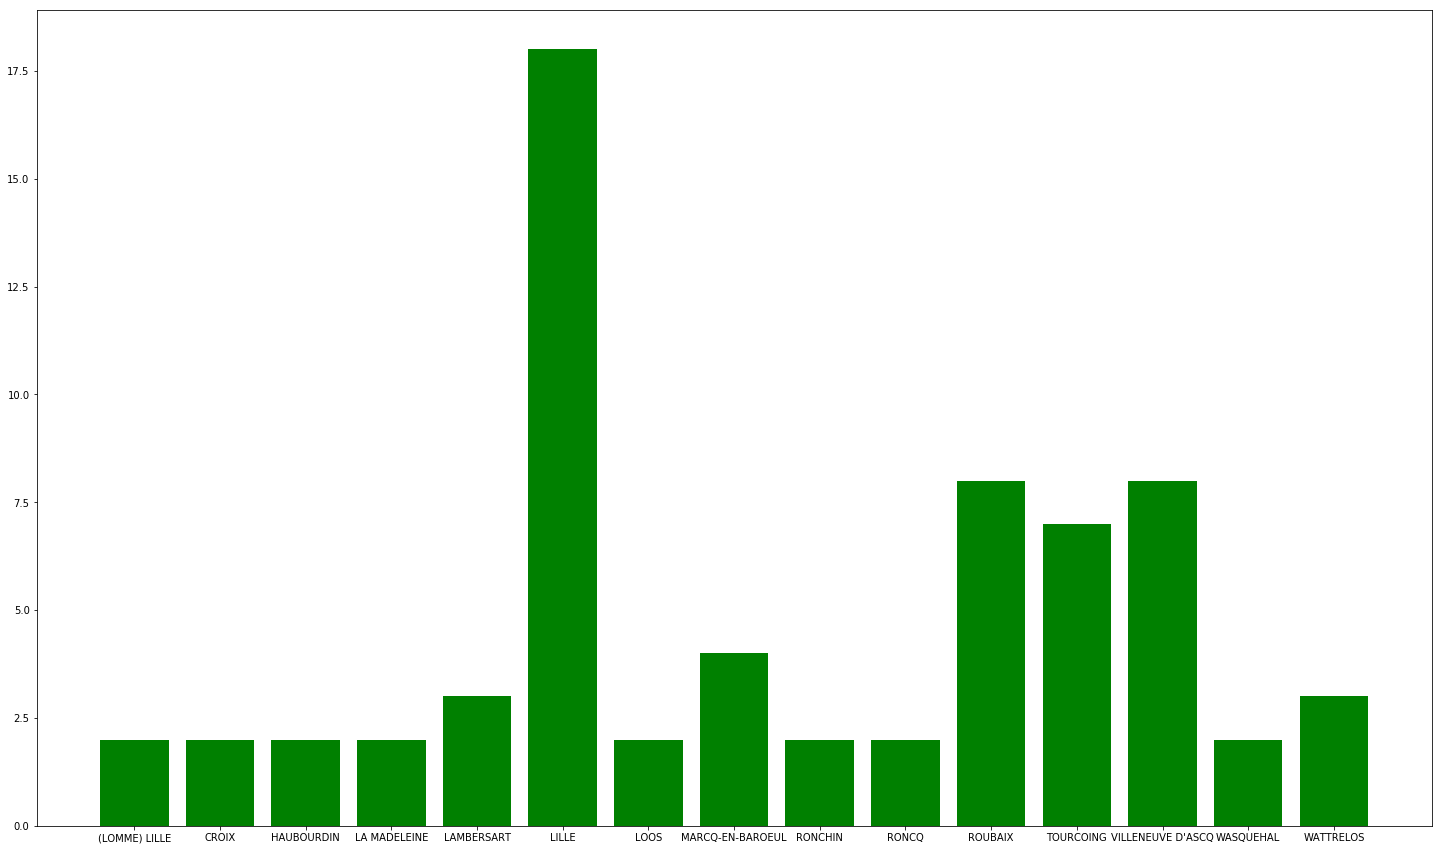

In [57]:
#les appels
dataQuery()
#dataHandler(dataQuery(), 0, 'fields.commune')
dataViz(dataHandler(dataQuery(), 0, 'fields.commune'))